# Analysis For RSQ3

This notebook will focus on analysing data called from the PokéAPI for research question 3.

I will start by looking for answers to **which individual pokémon has the highest individual stat for each category**. Then, I will expand on this question further by looking into the z-scores for all 6 categories (HP, Attack, Defense, Special Attack, Special Defense, Speed) as well as the base stat total.

In broadening this question, I hope to answer **which types of Pokémon have the highest base stat totals** and also see **can abilities give an indication to a pokémons strength**. 

## Task 1: Importing Libraries and Local Files

Below are the necessary imports needed for this notebook.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from scipy import stats #needed for z-score of stats 

#needed for radar chart
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [3]:
plt.style.use('ggplot')

I also loaded the saved local file to a Dataframe.

In [4]:
dfPokeStats = pd.read_csv("301_all_pokemon_data_base_stats_collect.csv")

I also created a function that will be used later on, it will print the name and ID number of the strongest pokemon per category.

In [5]:
def maxStat(dfPokeStats, column):
    message = ''
    for col in column:
        maxStat = dfPokeStats[col].max()
        id_no = dfPokeStats[dfPokeStats[col]==dfPokeStats[col].max()]['id'].values[0]
        name = dfPokeStats[dfPokeStats[col]==dfPokeStats[col].max()]['name'].values[0]
        message += 'ID: ('+ str(id_no) + '), NAME: ' + name +' has the highest '+col+' of '+str(maxStat)+'.\n'
    return message

I save the stats columns of this Dataframe to their own variable for easier access to them for analysis.

In [6]:
All_Stats = dfPokeStats[['HP', 'ATTACK','DEFENSE','SPECIAL_ATTACK','SPECIAL_DEFENSE','SPEED','TOTAL_STAT' ]]

## Task 2: Stats Analysis

I will start by analysing the individual stat layout and print the names of the strongest pokémon per category and getting a summary of the stats information. Then I will use the scipy import to get the the z-score of these values so that this data is normalised.

From there, I will be able to get a better idea of the layout of the stat categories and be able to create a more nuanced answer by understanding what contributes to a pokémon having a higher base stat total than the rest.

I start by creating a box plot of the stat categories. This visualisation will give a better understanding of the distribution of the six stats. It is evident that HP in particular has a lot of pokémon with a HP stat outside of its range.

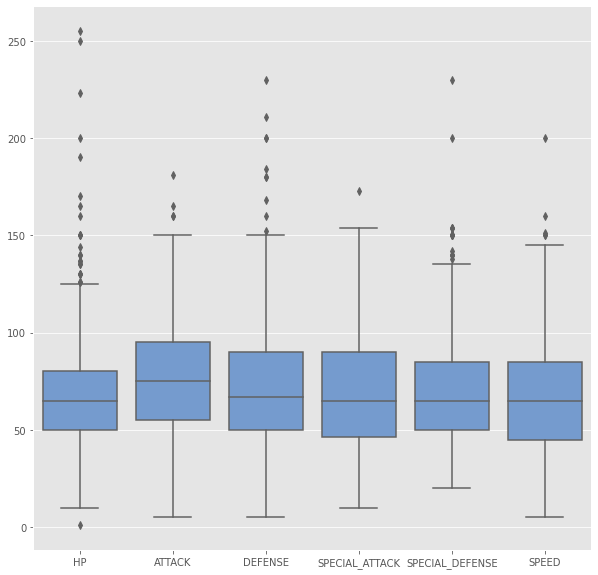

In [21]:
plt.rcParams['figure.figsize']=10,10  

df = All_Stats.drop(['TOTAL_STAT'], axis=1)
dfboxplot = sns.boxplot(data=df, color = '#69d') 
dfboxplot = dfboxplot.get_figure()

plt.show()
dfboxplot.savefig('302_0_AllStatDist_BoxPlot.png', dpi = 300, format='png', bbox_inches='tight')

Then, I use the maxStat function defined earlier on to print the name and ID of the strongest pokémon per category. 

This function answers our **main question: which individual pokémon has the highest individual stat for each category?** 

These values match up with the outliers from the boxplot above and we can confirm that it is Arceus that is the strongest in terms of base stat total. It is also worth noting that the pokémon Shuckle has the highest Defense and Special Defense.

In [22]:
print(maxStat(dfPokeStats, All_Stats))

ID: (242), NAME: blissey has the highest HP of 255.
ID: (798), NAME: kartana has the highest ATTACK of 181.
ID: (213), NAME: shuckle has the highest DEFENSE of 230.
ID: (796), NAME: xurkitree has the highest SPECIAL_ATTACK of 173.
ID: (213), NAME: shuckle has the highest SPECIAL_DEFENSE of 230.
ID: (894), NAME: regieleki has the highest SPEED of 200.
ID: (493), NAME: arceus has the highest TOTAL_STAT of 720.



It is worth analysing these pokémon so I then create a dataframe of the pokémons with with their individual max stat. When looking at the total stat column, we can see that the pokémon with a max category stat has a base stat total of between 505 - 580 while the highest base stat total is 720.

Based on this dataframe, it appears that a pokémon with a max category stat tends to have a relatively lower stat in other categories. 
    
    For example, with Shuckle they have the highest Defense and Special Defense at 230 points each, but they have very low  stats in HP (20points), Attack (10points), Special Attack(10points), Speed(5points).
    
When examining Arceus, the pokémon with the highest base stat total, it is clear that their stats are all equal (120points). While this pokémon does not have the maximum in any individual stat categories, I would consider this pokémon to be 'well-rounded' as it does not rely on one particular stat when in a fight and doesnt have an obvious weak point in its stats. 

In [23]:
All_Stats_Max = dfPokeStats[['id', 'name','HP', 'ATTACK','DEFENSE','SPECIAL_ATTACK','SPECIAL_DEFENSE','SPEED','TOTAL_STAT' ]]

In [24]:
All_Stats_Max.loc[(All_Stats_Max["id"] == 242) | (All_Stats_Max["id"] == 798) | (All_Stats_Max["id"] == 213) | (All_Stats_Max["id"] == 796) | (All_Stats_Max["id"] == 894) | (All_Stats_Max["id"] == 493)]

,id,name,HP,ATTACK,DEFENSE,SPECIAL_ATTACK,SPECIAL_DEFENSE,SPEED,TOTAL_STAT
212,213,shuckle,20,10,230,10,230,5,505
241,242,blissey,255,10,10,75,135,55,540
492,493,arceus,120,120,120,120,120,120,720
795,796,xurkitree,83,89,71,173,71,83,570
797,798,kartana,59,181,131,59,31,109,570
893,894,regieleki,80,100,50,100,50,200,580


Below I created a radar chart following the example given:

https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html

I use this radar chart to further examine the Pokémon that have a maximum stat. With these visuals, we can see that each Pokémons main strength comes from their max stats and the remaining stats are significantly lower. 

Again we see Arceus has a perfect hexagon shape, meaning all their stats are equal and this more than likely benefitted this Pokémon in becoming the one with the highest base stat total.

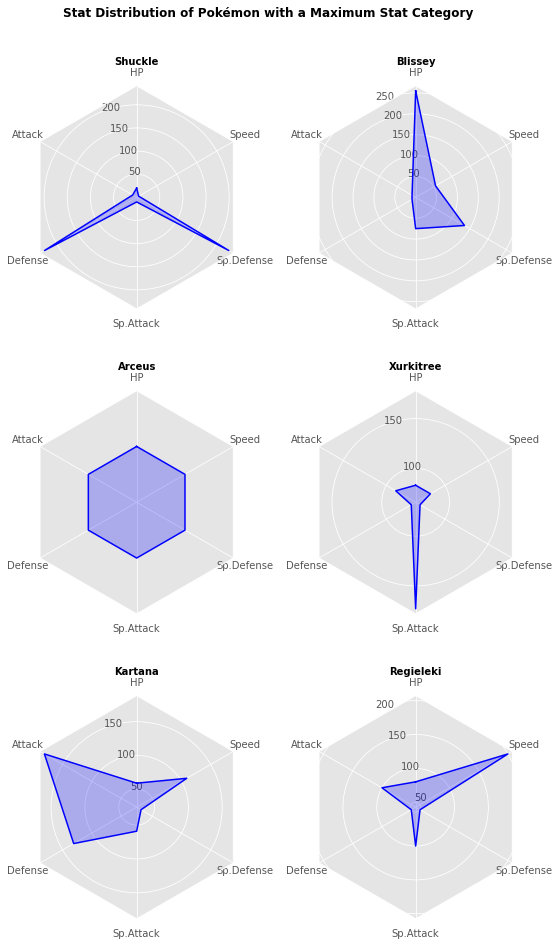

In [25]:
def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.
    This function creates a RadarAxes projection and registers it.
    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.
    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


def example_data():
    
    data = [
        ['HP', 'Attack', 'Defense', 'Sp.Attack', 'Sp.Defense', 'Speed'],
        ('Shuckle', [
            [20, 10, 230, 10, 230, 5]]),
        ('Blissey', [
            [255, 10, 10, 75, 135, 55]]),
        ('Arceus', [
            [120, 120, 120, 120, 120, 120]]),
        ('Xurkitree', [
            [83, 89, 71, 173, 71, 83]]),
        ('Kartana', [
            [59, 181, 131, 59, 31, 109]]),
        ('Regieleki', [
            [80, 100, 50, 100, 50, 200]]),
    ]
    return data


if __name__ == '__main__':
    N = 6
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(9, 15), nrows=3, ncols=2,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the six pokémon on separate axes
    for ax, (title, case_data) in zip(axs.flat, data):
        ax.set_rgrids([50, 100, 150, 200, 250, 300])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    fig.text(0.5, 0.9, 'Stat Distribution of Pokémon with a Maximum Stat Category',
             horizontalalignment='center', color='black', weight='bold',
             size='large')

    plt.show()
    fig.savefig('302_1_PokemonStats_RadarChart.png', dpi = 300, format='png', bbox_inches='tight')

## Task 3: Pokémon Z-Score

Using the scipy import, I applied the z-score of all the stat columns. This will give us an indication as to how each pokémons stat is in terms of its mean and will normalise our data. 

With the z-score applied, I created a histogram to see the distribution of the base stat totals. It appears that the base stat total has a bi-modal distribution with a peak starting around a standard deviation below the mean and another starting about half a standard deviation above it.

There is also a clear gap in the distribution between 1.5-2 standard deviations. This can indicate that pokémon with a z-score of above 2 can be considered 'overpowered' as there are very few pokémon which go above 2 deviations.

In [26]:
zscoreStats = All_Stats.apply(stats.zscore).add_suffix('_zscore')

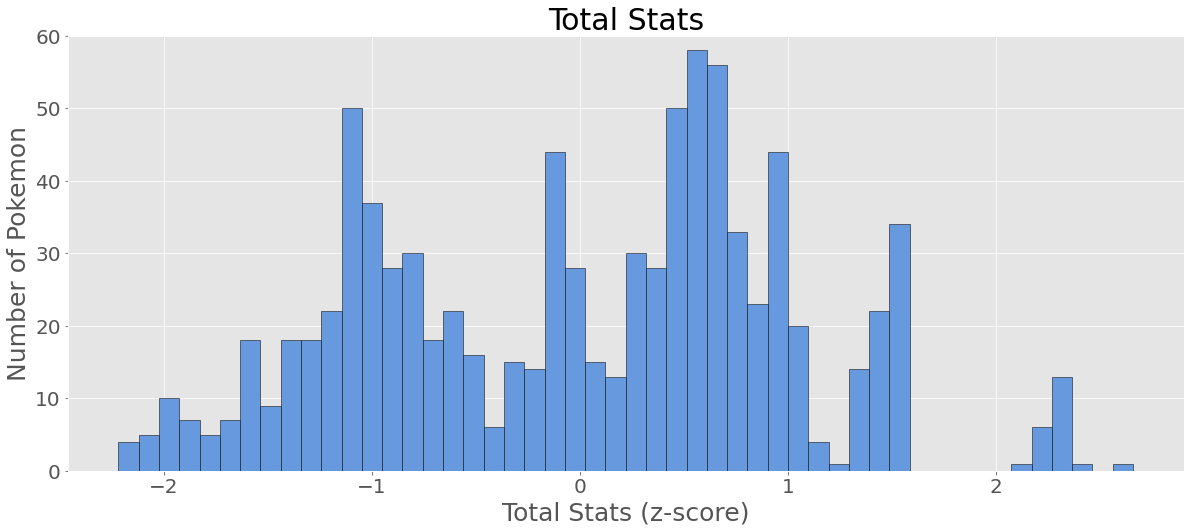

In [28]:
figure, ax = plt.subplots(figsize=(20,8))

ax.hist(zscoreStats["TOTAL_STAT_zscore"], bins = 50,  
        edgecolor = 'black', color = '#69d', zorder=3)

# Add labels and titles
ax.set_title("Total Stats", fontsize=30)
ax.set_ylabel("Number of Pokemon", fontsize = 25)
ax.set_xlabel("Total Stats (z-score)", fontsize = 25)

ax.tick_params(labelsize= 20)
ax.set_ylim(0,60)

# Add gridlines
ax.grid(axis="y", linestyle="-")
ax.grid(axis="x", linestyle="-")
plt.savefig('302_2_TotalStatDist_Zscore_BoxPlot.png', dpi = 300, format='png', bbox_inches='tight')

I also created an array of histograms for the 6 individual categories to show each of their distributions. 

We can see that HP, Defense, Special Defense, and Speed skew to the left which likely contributed to the bi-modal distribution as there is a peak that occurs below the mean. 

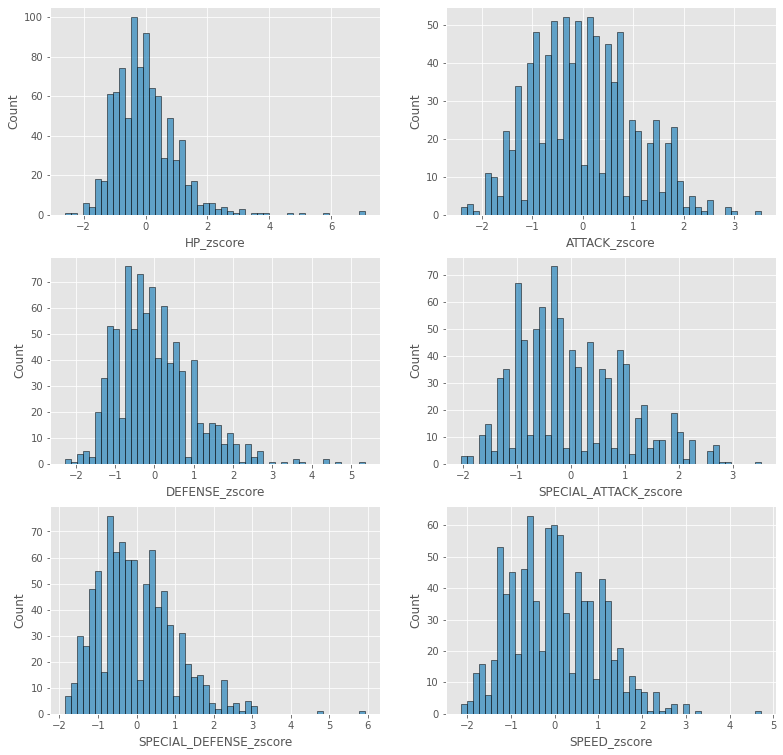

In [29]:
fig, axarr = plt.subplots(3, 2, figsize=(13, 13))

# Histogram of HP
sns.histplot(zscoreStats['HP_zscore'], kde=False, bins=50, 
             edgecolor = 'black', ax=axarr[0][0], label = 'HP')

# Histogram of Attack
sns.histplot(zscoreStats['ATTACK_zscore'], kde=False, bins=50, 
             edgecolor = 'black',ax=axarr[0][1] )

# Histogram of Defense
sns.histplot(zscoreStats['DEFENSE_zscore'], kde=False, bins=50, 
             edgecolor = 'black',ax=axarr[1][0] )

# Histogram of Sp.Attack
sns.histplot(zscoreStats['SPECIAL_ATTACK_zscore'], kde=False, bins=50, 
             edgecolor = 'black',ax=axarr[1][1] )

# Histogram of Sp.Defense
sns.histplot(zscoreStats['SPECIAL_DEFENSE_zscore'], kde=False, bins=50, 
             edgecolor = 'black',ax=axarr[2][0])
# Histogram of Speed
sns.histplot(zscoreStats['SPEED_zscore'], kde=False, bins=50, 
             edgecolor = 'black',ax=axarr[2][1] )

plt.savefig('302_3_StatsDist_Zscore_BoxPlot.png', dpi = 300, format='png', bbox_inches='tight')

From the analysis of the base stat total distribution, it seemed that pokémon with two standard deviations above the mean were significantly stronger as there were no pokémon close to that range. So, I joined the zscores to our local dataframe and will have these as their own column.

Then, I make a variable which has only the pokémon that are two deviations above the mean. This will leave us with the 22 strongest pokémon and their stats. This will be useful in comparing the strongest pokémon (in terms of base stat total) to the remaining pokémon.

In [30]:
df_pokez = dfPokeStats.join(zscoreStats, how = 'inner')

In [31]:
df_tops = df_pokez[df_pokez['TOTAL_STAT_zscore'] >= 2]
df_tops

,id,name,ABILITY1,ABILITY2,HIDDEN_ABILITY,TYPE1,TYPE2,HP,ATTACK,DEFENSE,...,SPECIAL_DEFENSE,SPEED,TOTAL_STAT,HP_zscore,ATTACK_zscore,DEFENSE_zscore,SPECIAL_ATTACK_zscore,SPECIAL_DEFENSE_zscore,SPEED_zscore,TOTAL_STAT_zscore
149,150,mewtwo,pressure,none,unnerve,psychic,none,106,110,90,...,90,130,680,1.411072,1.128383,0.613609,2.872250,0.745399,2.252054,2.299706
248,249,lugia,pressure,none,multiscale,psychic,flying,106,90,130,...,154,110,680,1.411072,0.453824,1.968635,0.692135,3.116024,1.548838,2.299706
249,250,ho-oh,pressure,none,regenerator,fire,flying,106,130,90,...,154,90,680,1.411072,1.802941,0.613609,1.373421,3.116024,0.845622,2.299706
288,289,slaking,truant,none,none,normal,none,150,160,100,...,65,100,670,3.090518,2.814778,0.952366,0.862456,-0.180627,1.197230,2.210234
381,382,kyogre,drizzle,none,none,water,none,100,100,90,...,140,90,670,1.182056,0.791103,0.613609,2.735993,2.597450,0.845622,2.210234
382,383,groudon,drought,none,none,ground,none,100,150,140,...,90,90,670,1.182056,2.477499,2.307392,1.032778,0.745399,0.845622,2.210234
383,384,rayquaza,air-lock,none,none,dragon,flying,105,150,90,...,90,95,680,1.372902,2.477499,0.613609,2.735993,0.745399,1.021426,2.299706
482,483,dialga,pressure,none,telepathy,steel,dragon,100,120,120,...,100,90,680,1.182056,1.465662,1.629879,2.735993,1.115809,0.845622,2.299706
483,484,palkia,pressure,none,telepathy,water,dragon,90,120,100,...,120,100,680,0.800364,1.465662,0.952366,2.735993,1.856629,1.197230,2.299706
485,486,regigigas,slow-start,none,none,normal,none,110,160,110,...,110,100,670,1.563749,2.814778,1.291122,0.351492,1.486219,1.197230,2.210234


## Task 4: Types

In Pokémon, types refer to the different elemental properties associated with a pokémon and their moves. There are currently 18 types and every type has its own strengths and weaknesses.

    For example, a fire-type pokémon is weak against a water-type pokémon.
    
A pokémon has a primary type but can also have an optional secondary type as well.

Since not every pokémon has two types, I checked the dataframe to see how many pokémon have a secondary type as well. Below we can see that there are 442 pokémon with a second type.

In [32]:
df_pokez[df_pokez["TYPE2"] != 'none'].shape

(442, 21)

I start this section off by finding the most common type of pokémon and to compare primary and secondary types. We can see that water-type pokémon are the most common primary type while flying-type are the least. 

However, flying-type is the most common secondary type and we can see that when combining both primary and secondary types together that flying-types are one of the most common types overall.

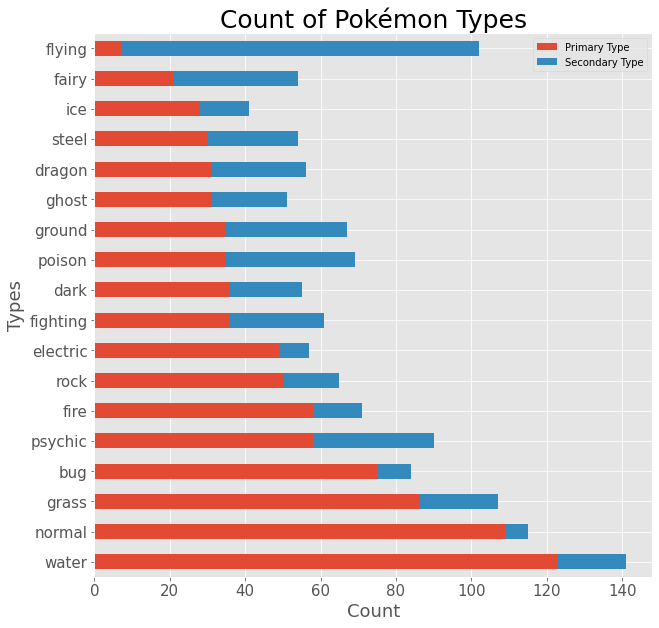

In [33]:
#counting secondary types while ignoring null values
type_2 = df_pokez[df_pokez['TYPE2'] != 'none']
type_2 = type_2['TYPE2'].value_counts()
#counting primary types
type_1 = df_pokez['TYPE1'].value_counts()

#creates dataframes of the types and count
df1 = pd.DataFrame(type_1.index,type_1.values).reset_index()
df1.columns = ['count', 'types']
df2 = pd.DataFrame(type_2.index,type_2.values).reset_index()
df2.columns = ['count', 'types']

#combines both dataframes 
result = pd.merge(df1, df2, on = ['types'])
result.columns = ['Primary Type', 'types', 'Secondary Type']
result = result.set_index('types')

result.plot(kind='barh', figsize=(10,10), stacked=True)
plt.title("Count of Pokémon Types", fontsize=25)
plt.xlabel("Count", fontsize=18)
plt.ylabel("Types", fontsize=18)
plt.tick_params(labelsize= 15)

plt.savefig('302_4_TotalTypes_CountPlot.png', dpi = 300, format='png', bbox_inches='tight')

Then, I used a countplot to find the most common types for the strongest pokémon we found above. We can see that psychic- and dragon-types are both tied with 4 pokémon with these types. This can indicate that these types may tend to be stronger than other types.

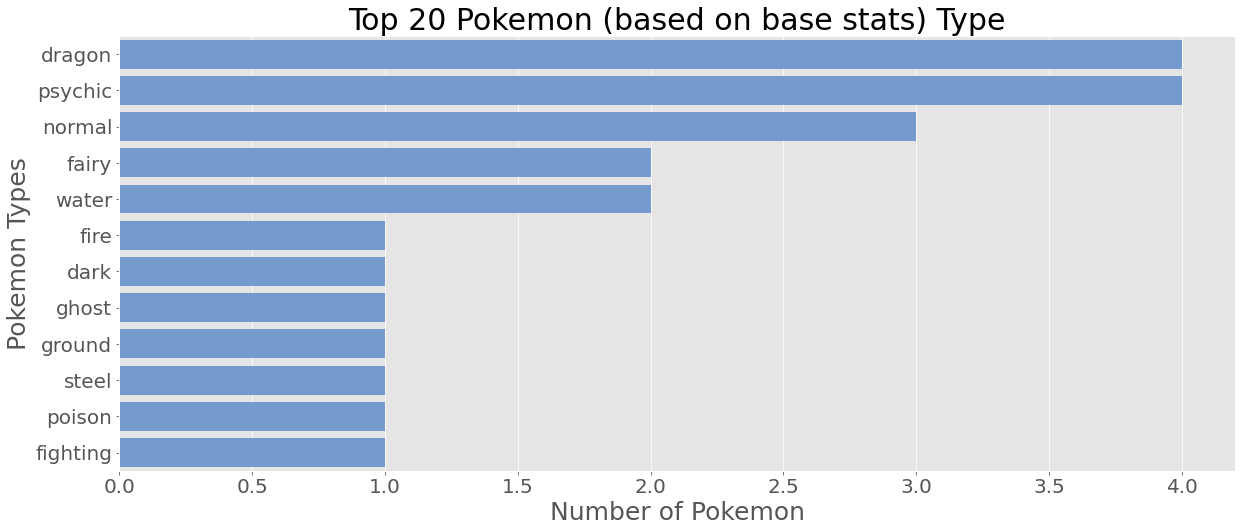

In [35]:
figure, ax = plt.subplots(figsize=(20,8))

ax = sns.countplot(y="TYPE1", data=df_tops, 
                   order = df_tops['TYPE1'].value_counts().index, color = '#69d')

ax.set_title("Top 20 Pokemon (based on base stats) Type", fontsize=30)
ax.set_ylabel("Pokemon Types", fontsize = 25)
ax.set_xlabel("Number of Pokemon", fontsize = 25)

ax.tick_params(labelsize= 20)
plt.savefig('302_5_StrongestPokemonTypes_CountPlot.png', dpi = 300, format='png', bbox_inches='tight')

I then compare the distribution of the base stat total z-score of every pokémon type. We can see that the normal-types max is the highest, which means the pokémon Arceus, who we found to have the highest base stat total, is a normal-type. 

We can also see dragon-types have the highest median and upper quartile. From what we have seen in the countplot above, this box plot also restates that dragon-types tend to have higher stats than other types as it appears dragon-types skew more to the right. We can also see that psychic-type also is a strong property as its upper quartile is one of the highest (tied against steel-types) and also has a high median.   

On the other hand, its also clear that bug-types are very weak in comparison to the other types available as their median is significantly lower than the rest and it seems like bug-types are skewing to the left more than the others. 

It is also worth noting that the flying-type category is not fully realised as I am only comparing primary types in this plot and, as we saw in a previous working, the majority of the flying-type pokémon are shown as secondary types.

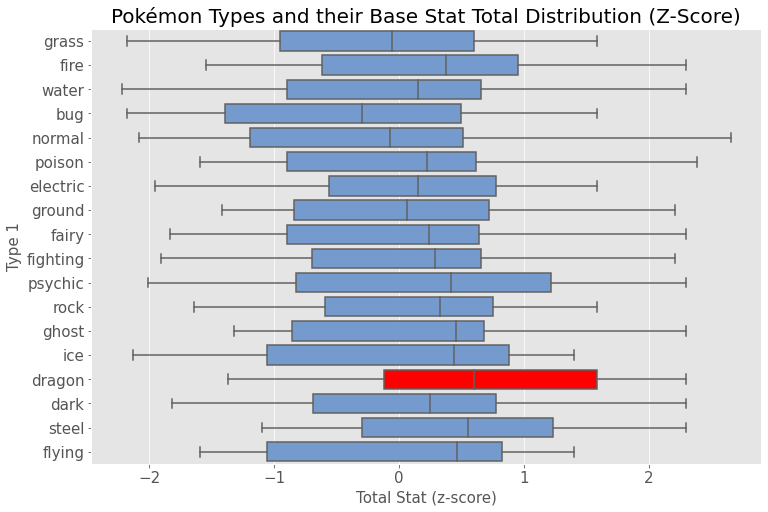

In [36]:
fig, ax =  plt.subplots(figsize=(12,8))
ax = sns.boxplot(y="TYPE1", x="TOTAL_STAT_zscore",data=df_pokez, color = '#69d')

mybox =ax.artists[14]
mybox.set_facecolor('red')

ax.set_title('Pokémon Types and their Base Stat Total Distribution (Z-Score)', fontsize = 20)
ax.set_xlabel('Total Stat (z-score)', fontsize = 15)
ax.set_ylabel('Type 1', fontsize = 15)
ax.tick_params(labelsize= 15)
plt.savefig('302_6_TypeDistribution_BoxPlot.png', dpi = 300, format='png', bbox_inches='tight')

To further show the dragon-types strength, I compare its z-score to all the other types. I compare their density distribution using a kernal density estimate plot and we can see that the dragon-type does skew to the right. This can indicate that dragon-types are one of the strongest types as their base stat totals z-score tends to be higher.

However, it is worth mentioning that dragon-types have one of the highest number of Legendary Pokémon. Legendary Pokémon are a group of rare and powerful Pokémon which have significantly higher stats than usual pokémon. Dragon-types have 15 Legendary Pokémon (tied with steel-types) and psychic-types have the most with 22 Legendary Pokémon. As a result of this information, the box plot and subsequent may be indicating that dragon-types are the strongest but the large amount of Legendary Pokémon in this property is likely causing this skew in the results. 

In [37]:
df_dragon = df_pokez[df_pokez["TYPE1"] == "dragon"]
df_not_dragon = df_pokez[df_pokez["TYPE1"] != "dragon"]

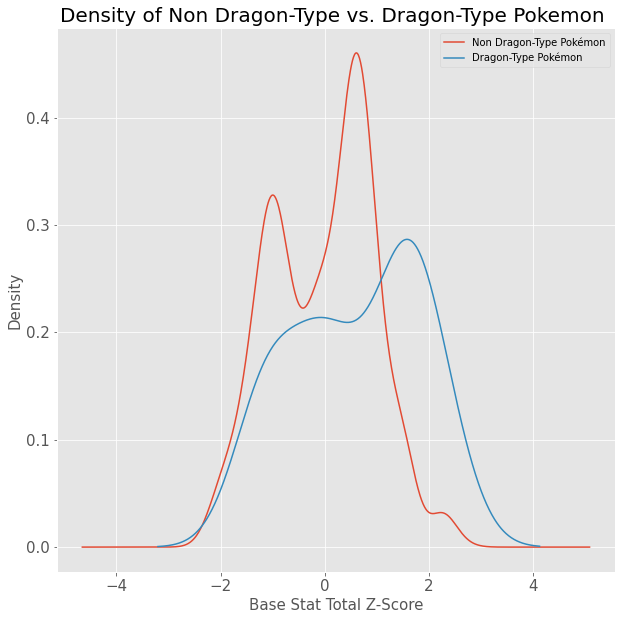

In [38]:
x = df_not_dragon["TOTAL_STAT_zscore"] 
y = df_dragon["TOTAL_STAT_zscore"]

df = pd.DataFrame({'Non Dragon-Type Pokémon' : x, 'Dragon-Type Pokémon': y})

ax = df.plot.kde()

ax.set_title("Density of Non Dragon-Type vs. Dragon-Type Pokemon ", fontsize=20)
ax.set_ylabel("Density", fontsize = 15)
ax.set_xlabel("Base Stat Total Z-Score", fontsize = 15)

ax.tick_params(labelsize= 15)
plt.savefig('302_7_DragonTypeDistribution_KDE.png', dpi = 300, format='png', bbox_inches='tight')

## Task 4:  Abilities

In Pokémon, an ability is a game mechanic which has a passive effect in battle. Some benefits are beneficial while others can have a negative effect in gameplay.
    
A pokémon can have only one ability but some of them have an optional second ability that they can choose from. 

The game also introduced hidden abilities later on in the game, this is unique as a pokémons hidden ability is only revealed under specific circumstances. In the game, catching a pokémon in Max Raid Battles gives the player a chance of having their hidden ability revealed, but there's no guarantee. 

Since all pokémon must have at least one ability but does not need to have a second optional ability nor a hidden ability, I checked to see how many pokémon within the dataframe are not empty. We can see that there are 479 pokémon with a second optional ability and 762 pokémon with a hidden ability.

In [39]:
df_pokez[df_pokez["ABILITY2"] != 'none'].shape

(479, 21)

In [40]:
df_pokez[df_pokez["HIDDEN_ABILITY"] != 'none'].shape

(762, 21)

Next, I look at the strongest pokémon and look at the abilities they possess. From this analysis, there is one ability that appeared more than once. 'Pressure' was the ability of 8 of the pokémon labelled the strongest.

    'Pressure' ability will raise a foes PP usage.
     PP (Power Points): when in battle, playing a move costs PP and once they are depleted a move can no longer be played.  If all of a pokémons moves are depleted, the pokémon will use a special attack move that will hurt itself and cause     minimal damage to its opponent.    

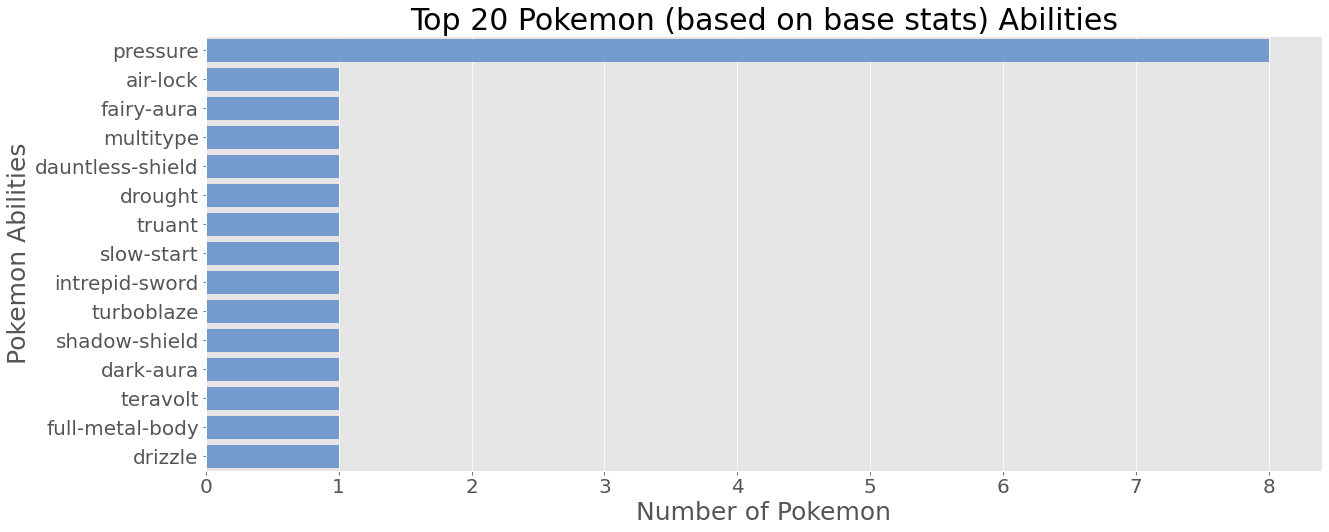

In [41]:
figure, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(y="ABILITY1", data=df_tops, order = df_tops['ABILITY1'].value_counts().index, color = '#69d')

ax.set_title("Top 20 Pokemon (based on base stats) Abilities", fontsize=30)
ax.set_ylabel("Pokemon Abilities", fontsize = 25)
ax.set_xlabel("Number of Pokemon", fontsize = 25)

ax.tick_params(labelsize= 20)
plt.savefig('302_8_StrongestPokemonAbilities_CountPlot.png', dpi = 300, format='png', bbox_inches='tight')

As we saw before, the 'Pressure' ability was the most common ability amongst the strongest pokémon. I would like to explore this further and confirm if this ability may be linked to a high base stat total. Firstly I check the other ability columns (ABILITY2, HIDDEN_ABILITY) to confirm that this ability is present in each column and so they will need to be included for an accurate look at this distribution.

In [42]:
df_pokez[df_pokez['ABILITY2'] == 'pressure']

,id,name,ABILITY1,ABILITY2,HIDDEN_ABILITY,TYPE1,TYPE2,HP,ATTACK,DEFENSE,...,SPECIAL_DEFENSE,SPEED,TOTAL_STAT,HP_zscore,ATTACK_zscore,DEFENSE_zscore,SPECIAL_ATTACK_zscore,SPECIAL_DEFENSE_zscore,SPEED_zscore,TOTAL_STAT_zscore
141,142,aerodactyl,rock-head,pressure,unnerve,rock,flying,80,105,65,...,75,130,515,0.418671,0.959743,-0.233282,-0.329794,0.189784,2.252054,0.823414


In [43]:
df_pokez[df_pokez['HIDDEN_ABILITY'] == 'pressure']

,id,name,ABILITY1,ABILITY2,HIDDEN_ABILITY,TYPE1,TYPE2,HP,ATTACK,DEFENSE,...,SPECIAL_DEFENSE,SPEED,TOTAL_STAT,HP_zscore,ATTACK_zscore,DEFENSE_zscore,SPECIAL_ATTACK_zscore,SPECIAL_DEFENSE_zscore,SPEED_zscore,TOTAL_STAT_zscore
319,320,wailmer,water-veil,oblivious,pressure,water,none,130,70,35,...,35,60,400,2.327133,-0.220734,-1.249551,0.010849,-1.291857,-0.209203,-0.205517
320,321,wailord,water-veil,oblivious,pressure,water,none,170,90,45,...,45,60,500,3.853903,0.453824,-0.910795,0.692135,-0.921447,-0.209203,0.689205
623,624,pawniard,defiant,inner-focus,pressure,dark,steel,45,85,70,...,40,60,340,-0.917252,0.285185,-0.063903,-1.011080,-1.106652,-0.209203,-0.742351
624,625,bisharp,defiant,inner-focus,pressure,dark,steel,65,125,100,...,70,70,490,-0.153867,1.634301,0.952366,-0.329794,0.004579,0.142405,0.599733


Then, I create a dataframe that does not contain 'Pressure' and compare its distribution to the pokémon who do have 'Pressure' as their ability. We see that there are 27 pokémon in total with the 'Pressure' ability present.

I use a kernal density estimate plot to visualise their distribution. We can see that pokémon that do have 'Pressure' as their ability have a higher base stat total as its distribution skews more to the right.

However, when researching the 'Pressure' Ability it appears that this is the most common ability amongst Legendary Pokémon. Legendary Pokémon are a group of rare and powerful Pokémon, this means that their stats are naturally stronger than a regular pokémon. With this information, the distribution of 'Pressure' being higher than average is likely a causation of the Legendary Pokémon and their higher stats.

In [44]:
df_noPressure = df_pokez[(df_pokez["ABILITY1"] != "pressure") & (df_pokez["ABILITY2"] != "pressure") & (df_pokez["HIDDEN_ABILITY"] != "pressure")]
df_Pressure = df_pokez[(df_pokez["ABILITY1"] == "pressure") | (df_pokez["ABILITY2"] == "pressure") | (df_pokez["HIDDEN_ABILITY"] == "pressure")]

In [45]:
print(df_noPressure.shape, df_Pressure.shape)

(871, 21) (27, 21)


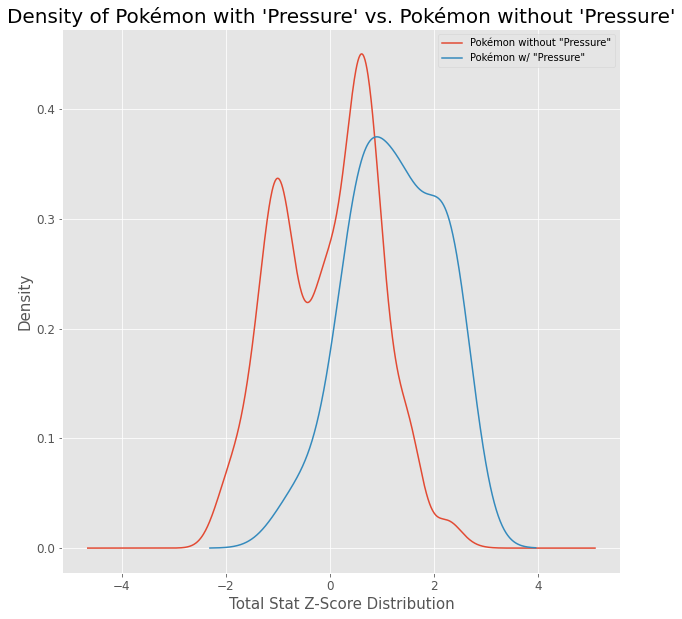

In [46]:
x = df_noPressure["TOTAL_STAT_zscore"] 
y = df_Pressure["TOTAL_STAT_zscore"]

df = pd.DataFrame({'Pokémon without "Pressure"' : x, 'Pokémon w/ "Pressure"': y})

ax = df.plot.kde()

ax.set_title("Density of Pokémon with 'Pressure' vs. Pokémon without 'Pressure'", fontsize=20)
ax.set_ylabel("Density", fontsize = 15)
ax.set_xlabel("Total Stat Z-Score Distribution", fontsize = 15)

ax.tick_params(labelsize= 12)
plt.savefig('302_9_PressureAbilityDistribution_KDE.png', dpi = 300, format='png', bbox_inches='tight')